# Imports

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Config
sns.set_theme(style="darkgrid")
sns.set()

# Open file

In [2]:
df = pd.read_csv("../data/clear_data.csv")

In [3]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,contract_type,salary_min,salary_max,technology,levels
0,.NET Developer,Warszawa,PL,net,partly_remote,C. H. Robinson,15000,mid,52.232258,20.984269,2021-02-20T16:00:06.464Z,True,False,permanent,7000,13000,"['Azure', '.Net', 'C#']","[1, 4, 4]"
1,Mid DevOps Engineer,Warszawa,PL,devops,partly_remote,STEPWISE,30,mid,52.226816,20.998821,2021-02-20T16:00:06.464Z,True,False,b2b,10000,15000,"['Continuous Integration', 'Linux', 'Docker']","[4, 4, 4]"
2,Android Senior Software Engineer,Warszawa,PL,mobile,partly_remote,ViacomCBS,10 000+,senior,52.220512,21.018066,2021-02-20T16:00:06.464Z,True,False,permanent,None,None,"['RxKotlin', 'Kotlin', 'Android']","[4, 5, 5]"
3,Junior Technical Implementation Engineer,Gdańsk,PL,support,office,Nevion Sp z o.o.,200,junior,54.339482,18.553891,2021-02-20T16:00:06.464Z,True,False,permanent,7000,10000,[],[]
4,Senior Java Developer,Warszawa,PL,java,remote,ASTEK Polska,800,senior,52.229375,21.013196,2021-02-20T16:00:06.464Z,True,True,b2b,16000,20600,"['Hibernate', 'Java', 'Spring']","[4, 4, 4]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4247 non-null   object 
 1   city              4247 non-null   object 
 2   country_code      4247 non-null   object 
 3   marker_icon       4247 non-null   object 
 4   workplace_type    4247 non-null   object 
 5   company_name      4247 non-null   object 
 6   company_size      4247 non-null   object 
 7   experience_level  4247 non-null   object 
 8   latitude          4247 non-null   float64
 9   longitude         4247 non-null   float64
 10  published_at      4247 non-null   object 
 11  remote_interview  4247 non-null   bool   
 12  remote            4247 non-null   bool   
 13  contract_type     4247 non-null   object 
 14  salary_min        4247 non-null   object 
 15  salary_max        4247 non-null   object 
 16  technology        4247 non-null   object 


# City

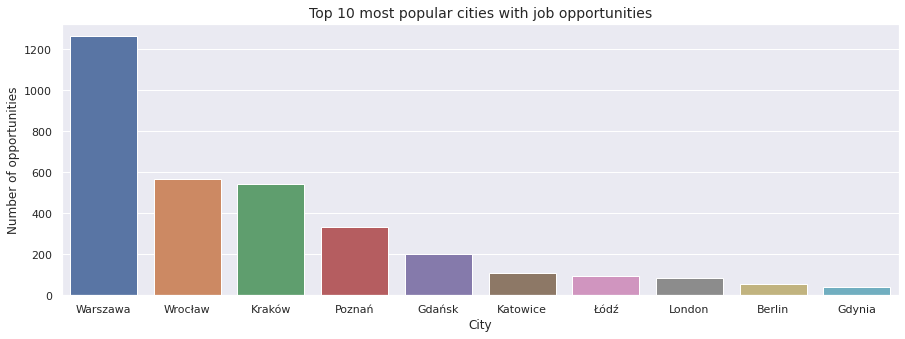

In [5]:
# Get first ten cities from column 'city'
city = df['city'].value_counts()[:10]

# Plotting a bar graph
plt.figure(figsize=(15,5))
sns.barplot(x=city.index, y=city.values)

# Simple config
plt.title("Top 10 most popular cities with job opportunities", fontsize=14)
plt.ylabel("Number of opportunities")
plt.xlabel("City")
plt.show()

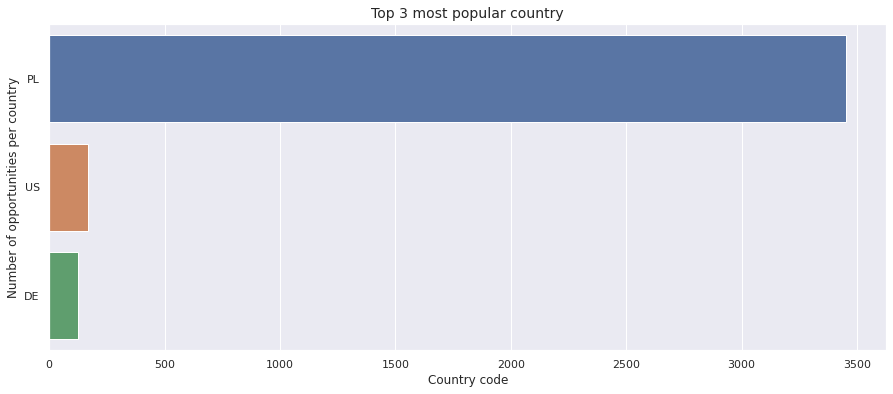

In [6]:
countries = df['country_code'].value_counts()[:3]


# Plotting a bar graph
plt.figure(figsize=(15,6))
sns.barplot(y=countries.index, x=countries.values, orient="h")

# Simple config
plt.title("Top 3 most popular country", fontsize=14)
plt.ylabel("Number of opportunities per country")
plt.xlabel("Country code")
plt.show()

# Technologies

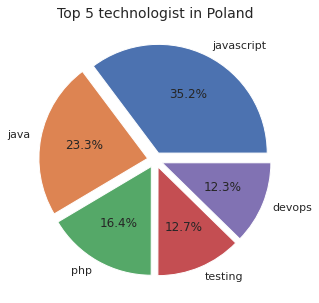

In [7]:
technologies = df['marker_icon'].value_counts()[:5]

plt.figure(figsize=(10,5))
plt.pie(x=technologies.values, labels=technologies.index, explode=[0.07]*5, autopct="%.1f%%")
plt.title("Top 5 technologist in Poland", fontsize=14)
plt.show()

# Workplace vs. COVID-19

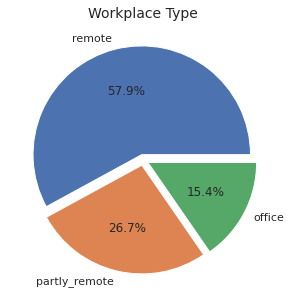

In [8]:
df_workplace = df['workplace_type'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(x=df_workplace.values, labels=df_workplace.index, explode=[0.05]*3, autopct="%.1f%%")
plt.title("Workplace Type", fontsize=14)
plt.show()

# Company size

In [9]:
df['company_size']

0         15000
1            30
2       10 000+
3           200
4           800
         ...   
4242       7-10
4243         12
4244         12
4245         30
4246          6
Name: company_size, Length: 4247, dtype: object

In [10]:
def clear_data(x):
    x = x.split('-')[0]
    x = re.sub('[-+<>,.]', '', x)
    x = x.replace(' ', '')
    if x == '':
        x = x.replace('', '0')
    x = int(x)
    return x

def categorize_company_size(x):
    if x < 100:
        return 0
    elif x > 100 and x < 1000:
        return 1
    else: 
        return 2

In [11]:
df['company_size_clear'] = df['company_size'].apply(lambda x: clear_data(x))

In [12]:
df['company_size_clear'] = df['company_size_clear'].apply(lambda x: categorize_company_size(x))

In [13]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,contract_type,salary_min,salary_max,technology,levels,company_size_clear
0,.NET Developer,Warszawa,PL,net,partly_remote,C. H. Robinson,15000,mid,52.232258,20.984269,2021-02-20T16:00:06.464Z,True,False,permanent,7000,13000,"['Azure', '.Net', 'C#']","[1, 4, 4]",2
1,Mid DevOps Engineer,Warszawa,PL,devops,partly_remote,STEPWISE,30,mid,52.226816,20.998821,2021-02-20T16:00:06.464Z,True,False,b2b,10000,15000,"['Continuous Integration', 'Linux', 'Docker']","[4, 4, 4]",0
2,Android Senior Software Engineer,Warszawa,PL,mobile,partly_remote,ViacomCBS,10 000+,senior,52.220512,21.018066,2021-02-20T16:00:06.464Z,True,False,permanent,None,None,"['RxKotlin', 'Kotlin', 'Android']","[4, 5, 5]",2
3,Junior Technical Implementation Engineer,Gdańsk,PL,support,office,Nevion Sp z o.o.,200,junior,54.339482,18.553891,2021-02-20T16:00:06.464Z,True,False,permanent,7000,10000,[],[],1
4,Senior Java Developer,Warszawa,PL,java,remote,ASTEK Polska,800,senior,52.229375,21.013196,2021-02-20T16:00:06.464Z,True,True,b2b,16000,20600,"['Hibernate', 'Java', 'Spring']","[4, 4, 4]",1
